In [1]:
#hal pertama yang dilakukan
import pandas as pd
import numpy as np
import scipy as sp

#plotting
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64

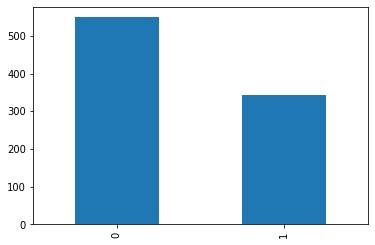

In [6]:
data['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

In [7]:
data['Sex'] = pd.factorize(data.Sex)[0]
data['Sex'].unique()

array([0, 1], dtype=int64)

In [8]:
data['Sex'].replace(0, 'Female',inplace=True)
data['Sex'].replace(1, 'Male',inplace=True)

Female    577
Male      314
Name: Sex, dtype: int64

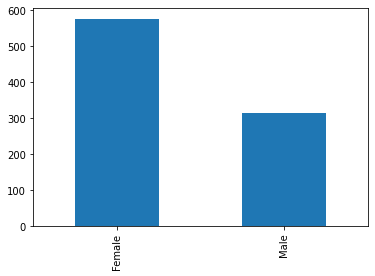

In [9]:
data['Sex'].value_counts().plot(kind='bar')
data['Sex'].value_counts()

In [10]:
def survival_stacked_bar(variable):
    died=data[data['Survived']==0][variable].value_counts()/len(data['Survived']==0)
    survived=data[data['Survived']==1][variable].value_counts()/len(data['Survived']==1)
    dataset=pd.DataFrame([died,survived])
    dataset.index=['Meninggal', 'Selamat']
    dataset.plot(kind='bar',stacked=True, title='Prosentase')
    return dataset.head()

,Female,Male
Meninggal,0.525253,0.090909
Selamat,0.122334,0.261504


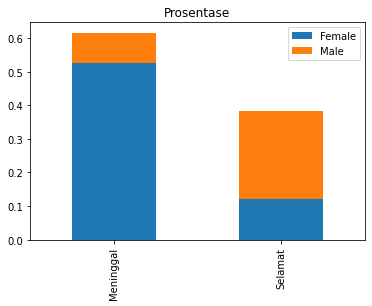

In [11]:
survival_stacked_bar('Sex')

no     549
yes    342
Name: Survivor, dtype: int64

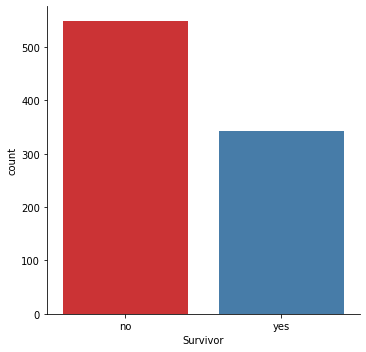

In [12]:
data['Survivor'] = data.Survived.map({0:'no',1:'yes'})
sns.catplot(x='Survivor',kind='count',data=data,palette='Set1')
data['Survivor'].value_counts()

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,Alone
0,1,0,3,"Braund, Mr. Owen Harris",Female,22.0,1,0,A/5 21171,7.2500,NaN,S,no,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Male,38.0,1,0,PC 17599,71.2833,C85,C,yes,1
2,3,1,3,"Heikkinen, Miss. Laina",Male,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Male,35.0,1,0,113803,53.1000,C123,S,yes,1
4,5,0,3,"Allen, Mr. William Henry",Female,35.0,0,0,373450,8.0500,NaN,S,no,0


In [18]:
data['Alone'] = data.SibSp + data.Parch
data['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [29]:
data['Alone'].loc[data['Alone'] > 0] = 'With Family'
data['Alone'].loc[data['Alone'] == 0] = 'Alone'
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,Alone,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",Female,22.0,1,0,A/5 21171,7.2500,NaN,S,no,With Family,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Male,38.0,1,0,PC 17599,71.2833,C85,C,yes,With Family,1
2,3,1,3,"Heikkinen, Miss. Laina",Male,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,Alone,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Male,35.0,1,0,113803,53.1000,C123,S,yes,With Family,1
4,5,0,3,"Allen, Mr. William Henry",Female,35.0,0,0,373450,8.0500,NaN,S,no,Alone,0


Alone          537
With Family    354
Name: Alone, dtype: int64

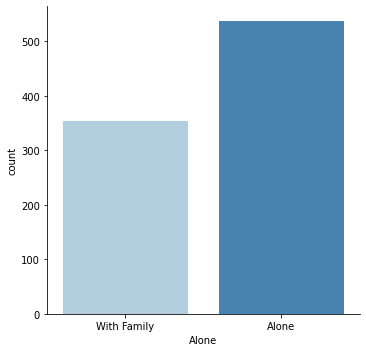

In [30]:
sns.catplot(x='Alone',kind='count',data=data,palette='Blues')
data['Alone'].value_counts()

In [31]:
data['Relatives'] = data.SibSp + data.Parch
data['Relatives']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survivor,Alone,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",Female,22.0,1,0,A/5 21171,7.2500,NaN,S,no,With Family,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Male,38.0,1,0,PC 17599,71.2833,C85,C,yes,With Family,1
2,3,1,3,"Heikkinen, Miss. Laina",Male,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,Alone,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Male,35.0,1,0,113803,53.1000,C123,S,yes,With Family,1
4,5,0,3,"Allen, Mr. William Henry",Female,35.0,0,0,373450,8.0500,NaN,S,no,Alone,0


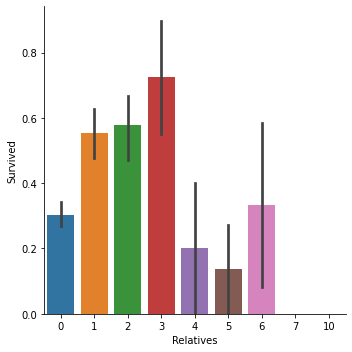

In [32]:
sns.catplot(x='Relatives',y='Survived',kind='bar',data=data)

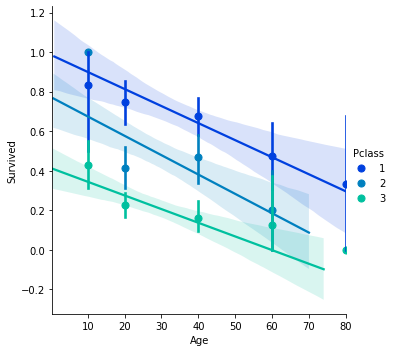

In [36]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=data,palette='winter',x_bins=generations)

In [37]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survivor         0
Alone            0
Relatives        0
dtype: int64

In [45]:
data.dropna(inplace=True)

In [46]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survivor       0
Alone          0
Relatives      0
dtype: int64